# Diagnóstico de Diabetes
Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir, a partir de mediciones diagnósticas, si un paciente tiene diabetes.ase (0 o 1)

## Contenido
Se impusieron varias restricciones a la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia indígena Pima.

- Embarazos: Número de veces embarazadas
- Glucosa: Concentración de glucosa plasmática a 2 horas en una prueba de tolerancia oral a la glucosa
- Presión arterial: Presión arterial diastólica (mm Hg)
- Grosor de la piel: Grosor del pliegue cutáneo del tríceps (mm)
- Insulina: Insulina sérica de 2 horas (mu U/ml)
- IMC: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigríFunción: Función del pedigrí de la diabetes
- Edad: Edad (años)
- Resultado: Variable de clase (0 o 1)

In [27]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [29]:
data = pd.read_csv('diabetes.csv')
print(f"shape: {data.shape}")
data.head()

shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Visualización del Datashet

In [30]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3. Preparación del datasheet

In [31]:
df.isnull().sum().to_frame('NaN value').T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
NaN value,0,0,0,0,0,0,0,0,0


In [32]:
for col in df:
    print(f"{col}: {df[col].nunique()}")

Pregnancies: 17
Glucose: 136
BloodPressure: 47
SkinThickness: 51
Insulin: 186
BMI: 248
DiabetesPedigreeFunction: 517
Age: 52
Outcome: 2


In [33]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [41]:
df.drop('Pregnancies', axis=1, inplace=True)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [43]:
df_sorted = df.sort_values(by="Outcome", ascending=True)
df_sorted

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
383,90,62,18,59,25.1,1.268,25,0
465,124,56,13,105,21.8,0.452,21,0
466,74,52,10,36,27.8,0.269,22,0
467,97,64,36,100,36.8,0.600,25,0
469,154,78,41,140,46.1,0.571,27,0
...,...,...,...,...,...,...,...,...
193,135,0,0,0,52.3,0.578,40,1
485,135,68,42,250,42.3,0.365,24,1
484,145,0,0,0,44.2,0.630,31,1
186,181,68,36,495,30.1,0.615,60,1


In [45]:
df_no_diabetes = df[df["Outcome"] == 0]  # Casos sin diabetes
df_diabetes = df[df["Outcome"] == 1]  # Casos con diabetes

In [46]:
df_no_diabetes.head()  # Muestra los primeros casos sin diabetes
df_diabetes.head()  # Muestra los primeros casos con diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
2,183,64,0,0,23.3,0.672,32,1
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
8,197,70,45,543,30.5,0.158,53,1


In [47]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

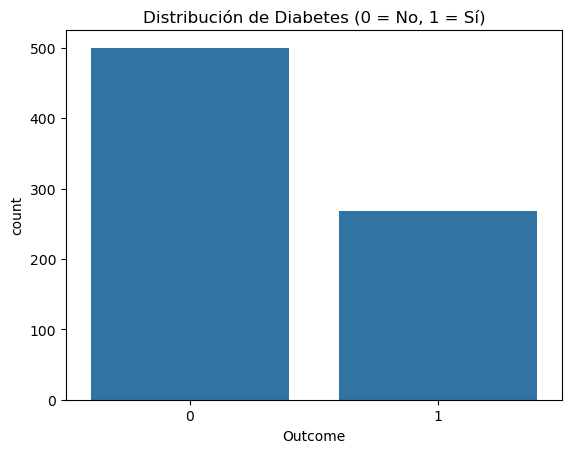

In [48]:
sns.countplot(x="Outcome", data=df)
plt.title("Distribución de Diabetes (0 = No, 1 = Sí)")
plt.show()